In [1]:
# Необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
import cv2

import qrcode

##### 1. Создайте QR-код для какого-либо сайта, сохраните его в виде изображения. Убедитесь, что Ваш смартфон его распознает, и что из этого изображения Вы можете извлечь оригинальную ссылку.

In [2]:
data = "https://www.asu.ru/timetable/students/18/2129437405/" # ссылка

filename = "qr.png" # имя выходного файла

img = qrcode.make(data) # генерируем qr-код

img.save(filename) # сохраняем img в файл

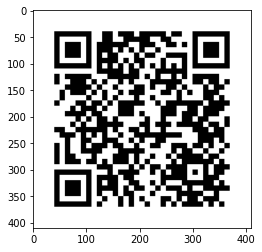

In [3]:
# Полученный qr-код
img = cv2.imread('qr.png')
img_copy = img.copy()
plt.imshow(img_copy)
plt.show()

##### 2. Извлеките ссылку из изображения «qr.jpg».

In [4]:
detector = cv2.QRCodeDetector() # инициализируем детектор QRCode
data, bbox, straight_qrcode = detector.detectAndDecode(img) # обнаружить и декодировать

In [5]:
# Расшифровка qr-кода
if bbox is not None:
    print(f"QRCode data:\n{data}")

QRCode data:
https://www.asu.ru/timetable/students/18/2129437405/


##### 3. Распознайте с помощью pytesseract текст на немецком языке из изображения «de_text1.png». Пометьте с помощью рамок зеленого цвета слова «ich» в исходном изображении.

In [6]:
# Необходимая библиотека
import pytesseract

In [7]:
# функция для открытия и отображения изображения
def open_image(fileName):
  image = cv2.imread(fileName)
  plt.figure(figsize=(10,15))
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image)
  plt.show()
  return image

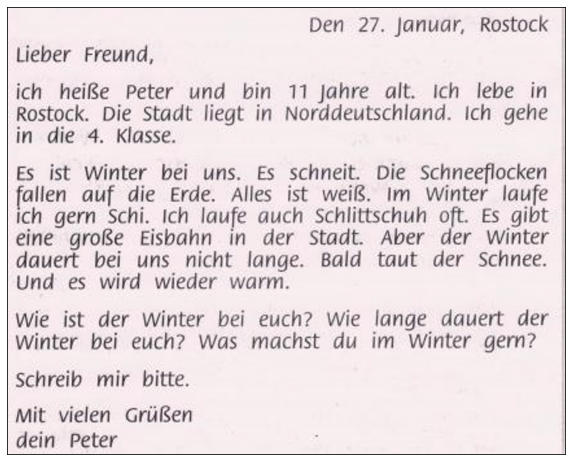

In [8]:
image = open_image('lab7/de_text1.png') # изображение с текстом

In [9]:
string = pytesseract.image_to_string(image, lang='deu') # получаем строку

print(string) # печатаем

Den 27. Januar, Rostock
Lieber Freund,

ich heiße Peter und bin 11 Jahre alt. Ich lebe in
Rostock. Die Stadt liegt in Norddeutschland. Ich gehe
in die 4. Klasse.

Es ist Winter bei uns. Es Schneit. Die Schneeflocken
fallen auf die Erde. Alles ist weiß. ım Winter laufe
ich gern Schi. Ich laufe auch Schlittschuh oft. Es gibt
eine große Eisbahn in der Stadt. Aber der Winter
dauert bei uns nicht lange. Bald taut der Schnee.
Und es wird wieder warm.

Wie ist der Winter bei euch? Wie lange dauert der
Winter bei euch? Was machst du im Winter gern?

Schreib mir bitte.

Mit vielen Grüßen
dein Peter



In [10]:
image_copy = image.copy() # чтобы нарисовать сделаем копию изображения

target_word = "ich" # слово для поиска

data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT) # получить все данные из изображения

In [11]:
word_occurences = [ i for i, word in enumerate(data["text"]) if word.lower() == target_word ] # получить все вхождения нужного слова

for occ in word_occurences:
    # извлекаем ширину, высоту, верхнюю и левую позицию для обнаруженного слова
    w = data["width"][occ]
    h = data["height"][occ]
    l = data["left"][occ]
    t = data["top"][occ]
    # определяем все точки окружающей рамки
    p1 = (l, t)
    p2 = (l + w, t)
    p3 = (l + w, t + h)
    p4 = (l, t + h)
    # рисуем 4 линии (прямоугольник)
    image_copy = cv2.line(image_copy, p1, p2, color=(0, 255, 0), thickness=2)
    image_copy = cv2.line(image_copy, p2, p3, color=(0, 255, 0), thickness=2)
    image_copy = cv2.line(image_copy, p3, p4, color=(0, 255, 0), thickness=2)
    image_copy = cv2.line(image_copy, p4, p1, color=(0, 255, 0), thickness=2)

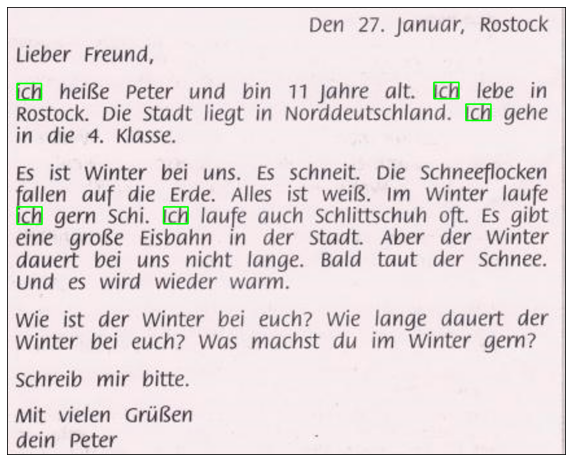

In [12]:
# Результат выделения
plt.figure(figsize=(10,15))
plt.xticks([])
plt.yticks([])
plt.imsave("all_ich_words.png", image_copy)
plt.imshow(image_copy)
plt.show()

##### 4. Попробуйте придумать и реализовать преобразования (геометрические, цветовые, морфологические или любые другие) изображений «rus_text1.jpg», «rus_text2.jpg», «rus_text3.jpg» и «rus_text4.jpg», чтобы текст на них всё же можно было распознать с помощью pytesseract.

In [13]:
# Отрисовка изображений
def draw_image(images):
    fig, axs = plt.subplots(1, 4, figsize=(15, 10))
    for k in range(len(images)):
        axs[k].imshow(images[k])
    plt.show()

In [14]:
# Поворот изображения на заданный угол
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

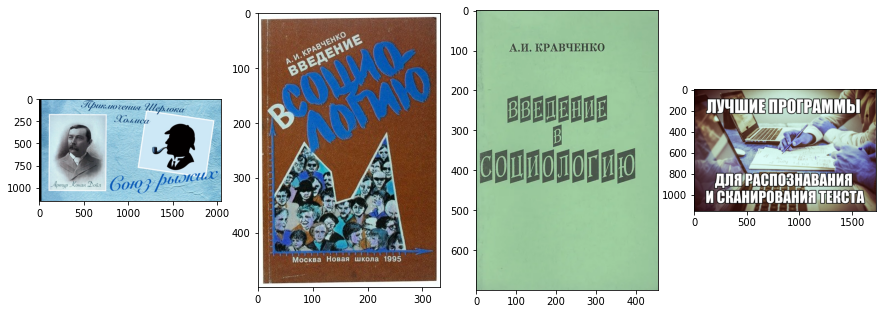

In [15]:
# Получение изображений
img_path = ['lab7/rus_text1.jpg', 'lab7/rus_text2.jpg', 'lab7/rus_text3.jpg', 'lab7/rus_text4.jpg']
images = []
for i in img_path:
        img = cv2.imread(i)
        img_copy = img.copy()
        images.append(img_copy)
draw_image(images)

#### Изображение 1

In [16]:
image_copy = images[0].copy() # получаем изображение

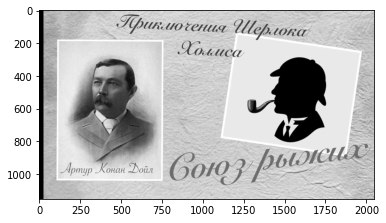

In [17]:
# Преобразование в серый
gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.show()

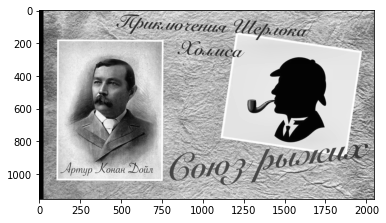

In [18]:
# Повышение контраста
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
contrast = clahe.apply(gray_image)
plt.imshow(contrast, cmap='gray')
plt.show()

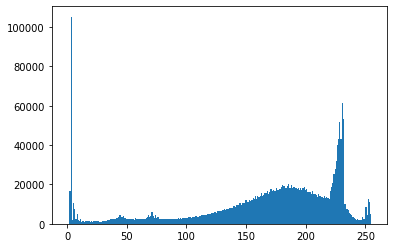

In [19]:
# Гистограмма интенсивности цветов
plt.hist(np.ravel(contrast), bins=256)
plt.show()

In [20]:
# Бинаризация
light_1 = (0)
light_2 = (150)
bin = cv2.inRange(gray_image, light_1, light_2)
cv2.imwrite('bin_image.jpg', bin) # сохраняем изображение

True

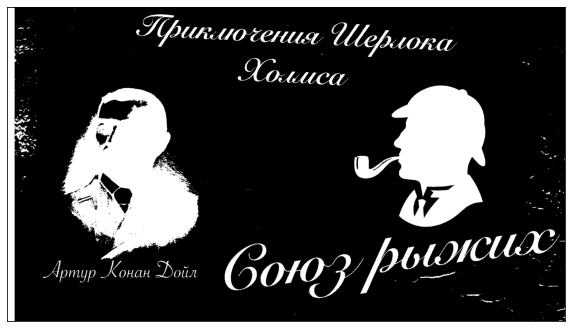

In [21]:
# Получаем результат
image = open_image('bin_image.jpg')

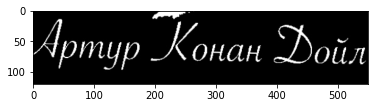

In [22]:
# Получаем фрагмент
img = image[910:1030, 150:700] 
image_r = rotate_image(img, -1.3)
plt.imshow(image_r)
plt.show()

In [23]:
string = pytesseract.image_to_string(image_r, lang='rus') # получаем строку

print(string) # печатаем

Артур _Конан “Ройл



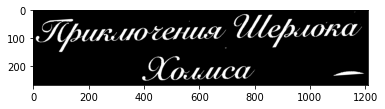

In [24]:
# Получаем фрагмент
img = image[30:300, 460:1670] 
image_r = rotate_image(img, 4)
plt.imshow(image_r)
plt.show()

In [25]:
string = pytesseract.image_to_string(image_r, lang='rus') # получаем строку

print(string) # печатаем

Приплюгения Иериона



#### Изображение 2

In [26]:
image_copy = images[1].copy() # получаем изображение

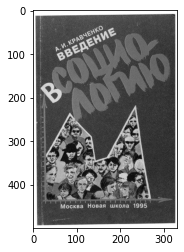

In [27]:
# Преобразование в серый
gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.show()

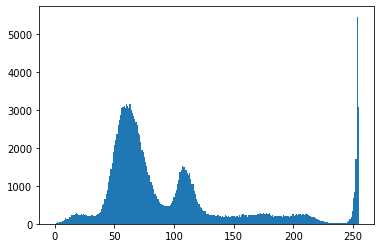

In [28]:
# Гистограмма интенсивности цветов
plt.hist(np.ravel(gray_image), bins=256)
plt.show()

In [29]:
# Бинаризация
light_1 = (160)
light_2 = (250)
bin = cv2.inRange(gray_image, light_1, light_2)
cv2.imwrite('bin_image.jpg', bin) # сохраняем изображение

True

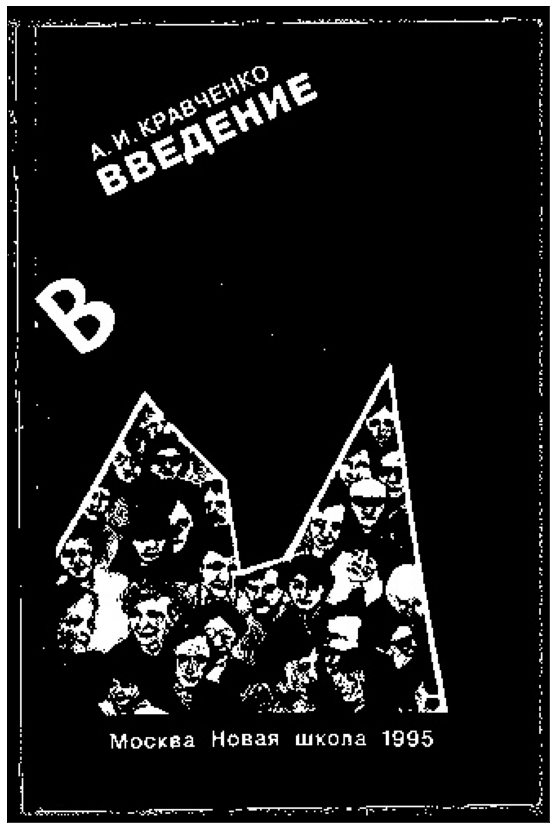

In [30]:
# Получаем результат
image = open_image('bin_image.jpg')

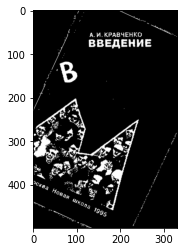

In [31]:
# Поворот изображения
image_r = rotate_image(image, -25)
plt.imshow(image_r)
plt.show()

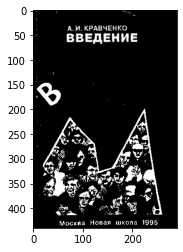

In [32]:
# Выравнивание текста
image[0:150, 50:220] = image_r[0:150, 100:270]
img = image[20:460, 10:300] 
plt.imshow(img)
plt.show()

In [33]:
string = pytesseract.image_to_string(img, lang='rus') # получаем строку

print(string) # печатаем

А.И. КРАВЧЕНКО

ВВЕДЕНИЕ

Москва Новая школа 1995



#### Изображение 3

In [34]:
image_copy = images[2].copy() # получаем изображение

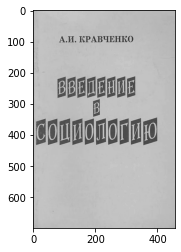

In [35]:
# Преобразование в серый
gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.show()

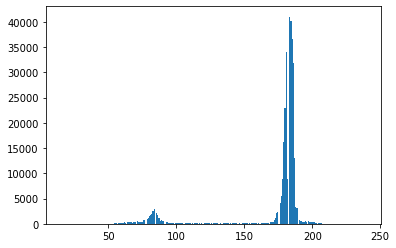

In [36]:
# Гистограмма интенсивности цветов
plt.hist(np.ravel(gray_image), bins=256)
plt.show()

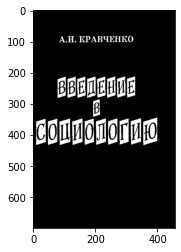

In [37]:
# Бинаризация
light_1 = (20)
light_2 = (120)
bin = cv2.inRange(gray_image, light_1, light_2)
plt.imshow(bin, cmap='gray')

In [38]:
# Получение контуров
contours, _ = cv2.findContours(bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
bin = cv2.rectangle(bin,(0,200), (400,450),(0,0,0), -1)

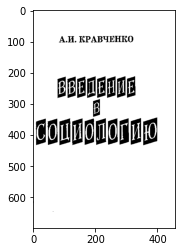

In [39]:
# Получение маски
light_1 = (150)
light_2 = (255)
mask = cv2.inRange(gray_image, light_1, light_2)
plt.imshow(mask, cmap='gray')

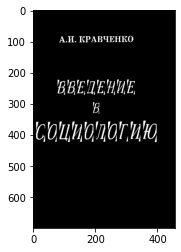

In [40]:
# Выравнивание текста
aligned_image = bin

for contour in contours[0:27]:
    # Ограничивающий прямоугольник для контура
    rect = cv2.minAreaRect(contour)
        
    # Угол поворота
    angle = -15

    # Поворот контура
    M = cv2.getRotationMatrix2D(rect[0], angle, 1)

    rotated = cv2.warpAffine(mask, M, (mask.shape[1], mask.shape[0]), flags=cv2.INTER_CUBIC)
        
    # Выравнивание буквы
    x, y, w, h = cv2.boundingRect(contour)
    aligned_image[y+10:y+h-10, x:x+w-2] = rotated[y+10:y+h-10, x:x+w-2]

cv2.imwrite('bin_image.jpg', aligned_image)
# Отображение результата
plt.imshow(aligned_image, cmap='gray')
plt.show()

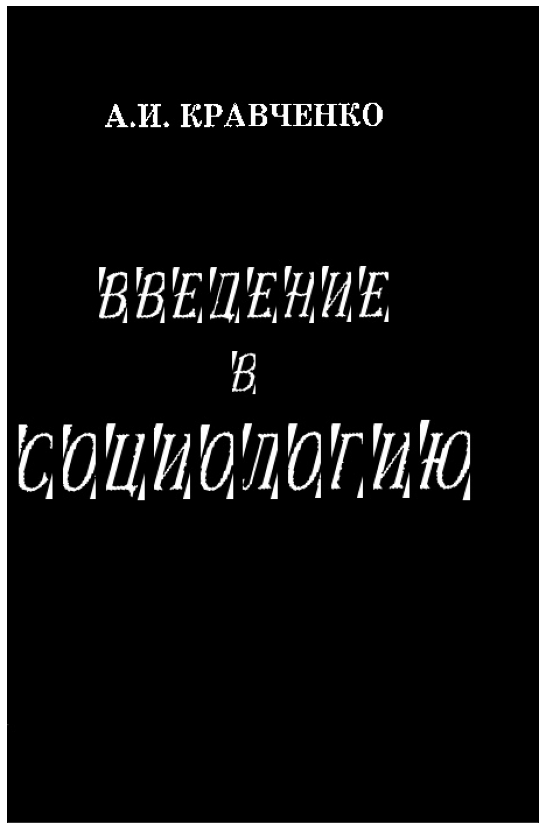

In [41]:
# Получаем результат
image = open_image('bin_image.jpg')

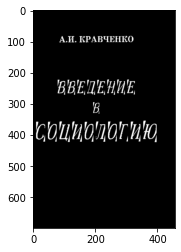

In [42]:
# Поворот изображения
image_r = rotate_image(image, -0.1)
plt.imshow(image_r)
plt.show()

In [43]:
string = pytesseract.image_to_string(image_r, lang='rus') # получаем строку

print(string) # печатаем

А.И. КРАВЧЕНКО

ВВЕДЕНИЕ
В
СОЦИОЛОГИЮ



#### Изображение 4

In [44]:
image_copy = images[3].copy() # получаем изображение

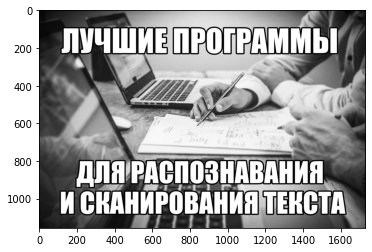

In [45]:
# Преобразование в серый
gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.show()

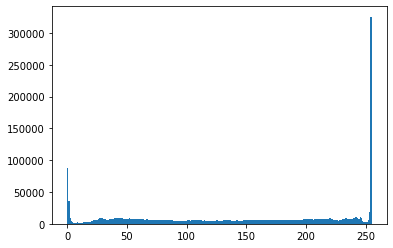

In [46]:
# Гистограмма интенсивности цветов
plt.hist(np.ravel(gray_image), bins=256)
plt.show()

In [47]:
# Бинаризация
img = np.array(gray_image)
img = np.where(img > 244, 0, 255)
cv2.imwrite('bin_image.jpg', img)

True

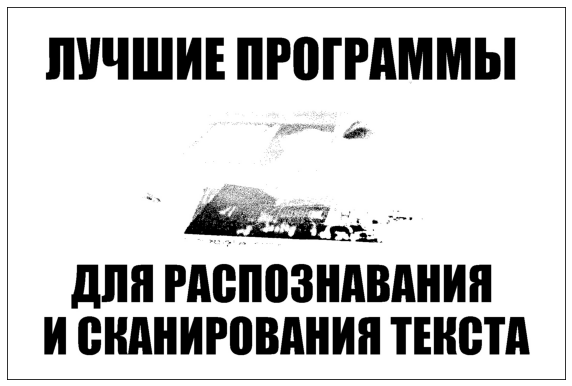

In [48]:
# Получаем результат
image = open_image('bin_image.jpg')

In [49]:
string = pytesseract.image_to_string(image, lang='rus') # получаем строку

print(string) # печатаем

ЛУЧШИЕ ПРОГРАММЫ

ДЛЯ РАСПОЗНАВАНИЯ
И СКАНИРОВАНИЯ ТЕКСТА



##### 5. Создайте 2 собственных образца рукописного текста (в графическом редакторе или фото/скан) на русском и любом другом языке. Попробуйте выполнить их распознавание с помощью pytesseract.

In [50]:
# Получение изображений
img_path = ['lab7-1/rukopi3.jpg', 'lab7-1/rukopi6.jpg']
images = []
for i in img_path:
        img = cv2.imread(i)
        img_copy = img.copy()
        images.append(img_copy)

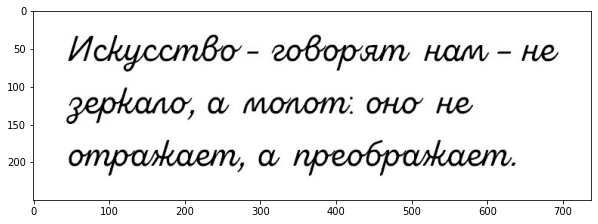

Искусство - говорят‚ натм‚ - не,
деркало;, а@ мопот; оно’ не
отрожает, а‚ преображает.



In [51]:
# 1-е изображение
plt.figure(figsize=(10,15))
plt.imshow(images[0])
plt.show()

string = pytesseract.image_to_string(images[0], lang='rus') # получаем строку

print(string) # печатаем

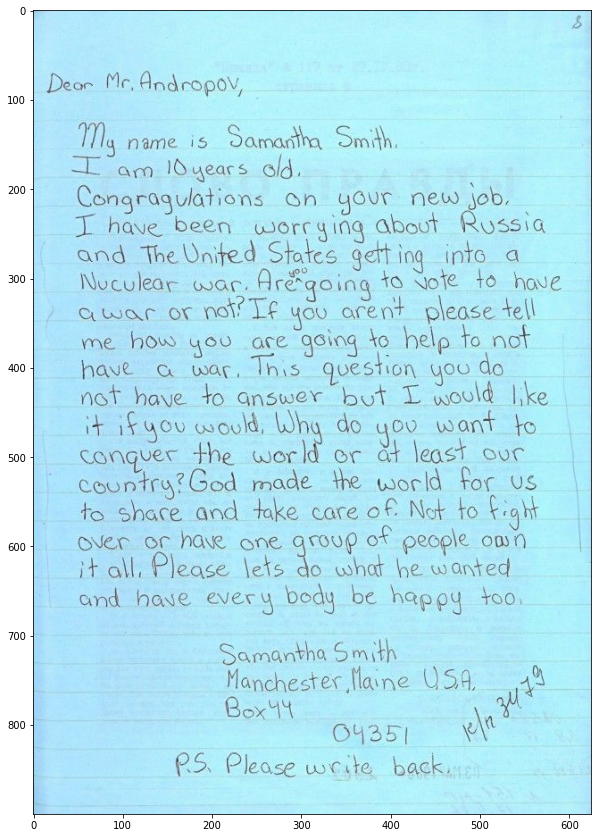

Dear Me, Andropoy,

My bine. is_ Samaria Oma.

Zam !O0 years ald.

Congragulations on your new job,
T have been worrying about Russia
and The United States gett ing into a
Nuculear war. Aréqoing to Note to hove
awar or nol? Tf you arent please tell
me how you ace going to help to not
hove a war, This question you do
not have to answer but L would like
it 1£ you sould, Why do you want to
conquer the ara or at least our
countra?Ged made te world For us
to share and take care of Nok to (ght
over oF hae one grove of people on
it all, Please \ets ae what he wanted
and hase every body be hapey too,

Samantha Smith
Manchester flane US4, 4a
Box'4 :
cuss;
C5, Please write back,



In [52]:
# 2-е изображение
plt.figure(figsize=(10,15))
plt.imshow(images[1])
plt.show()

string = pytesseract.image_to_string(images[1], lang='eng') # получаем строку

print(string) # печатаем

##### 6. Распознайте текст из «pdf1.pdf» и «pdf2.pdf» (все страницы). Субъективно оцените качество распознавания.

In [53]:
# Необходимая библиотека
import fitz

In [54]:
# Распознование текста
def recognition(image):
    recognized_text = pytesseract.image_to_string(image, lang="rus+eng")
    return recognized_text

In [55]:
files = ['lab7/pdf1.pdf', 'lab7/pdf2.pdf'] # пути к файлам

# Считывание pdf-файлов
def reader_pdf(file):
    images=[]
    doc = fitz.open(file)
    for i in range(doc.page_count):
        page = doc.load_page(i) # Загружается 1-я страница pdf-файла (индекс 0)
        pix = page.get_pixmap() 
        image = np.frombuffer(pix.samples, dtype=np.uint8).reshape(pix.h, pix.w, pix.n) # Получаем изображение для дальнейшего распознавания
        images.append(image)
        fig, axs = plt.subplots(1, 2, figsize=(30, 10)) 
        axs[0].imshow(image, cmap='gray')  
        axs[0].axis('off') 

        text = recognition(image)
        axs[1].text(0.5, 0.5, text, fontsize=12, ha='center', wrap=True)  
        axs[1].axis('off')  
        plt.show()
    return images

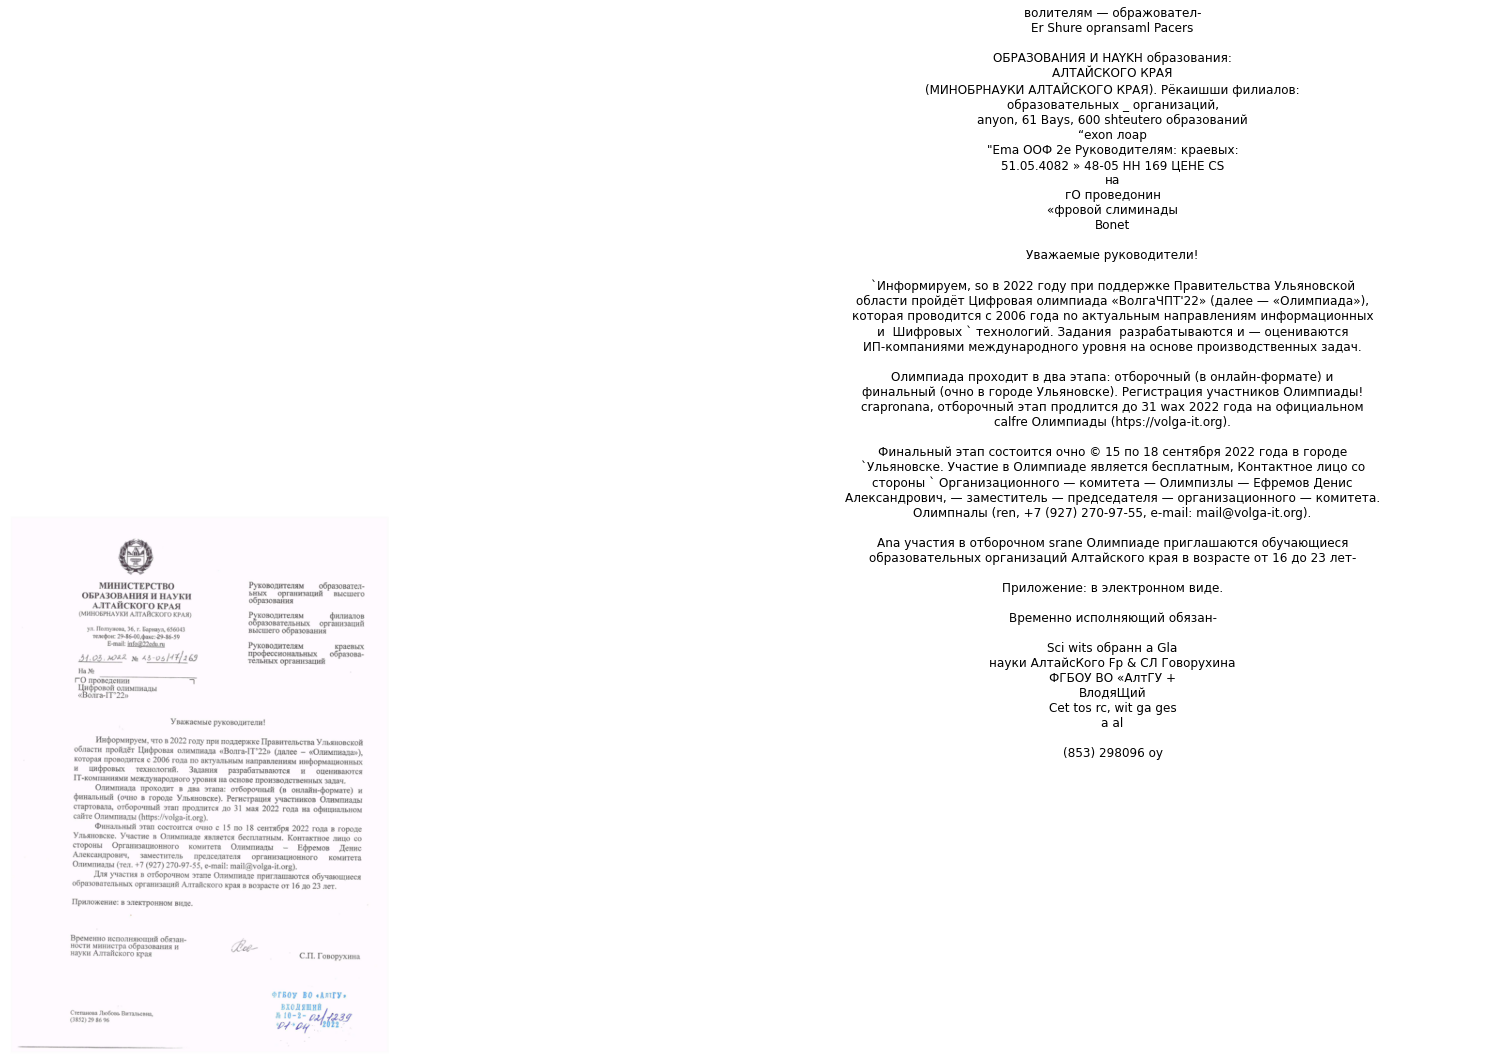

In [56]:
# Первый файл
images = reader_pdf(files[0])[0]

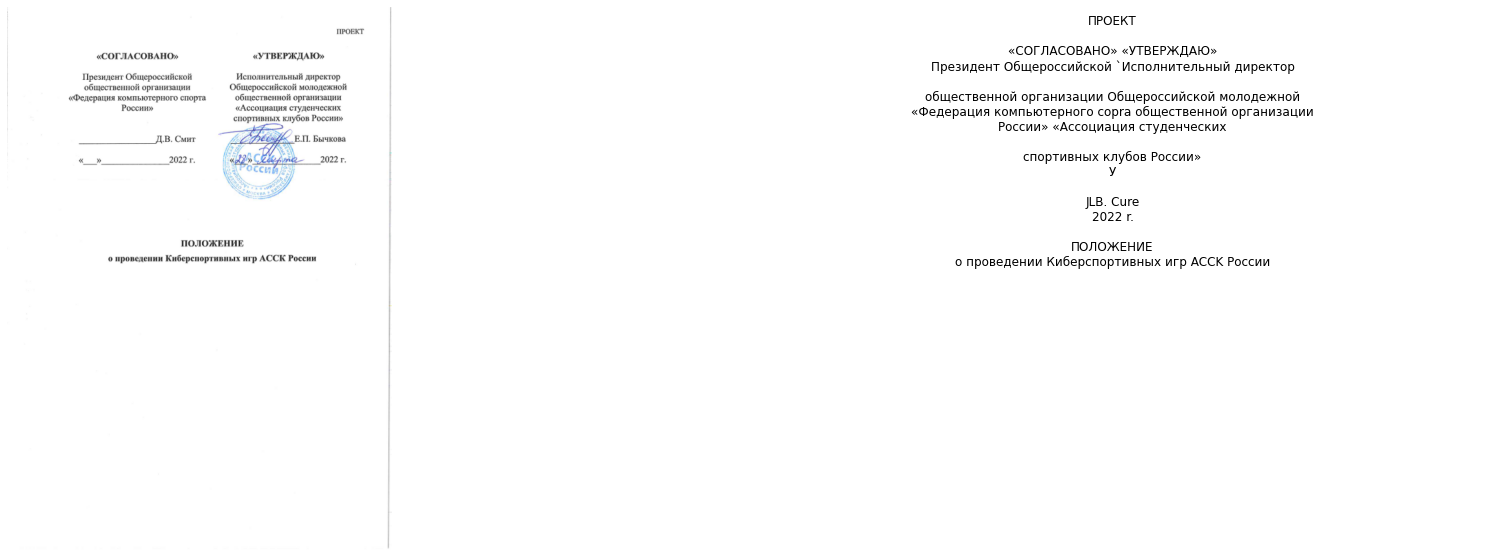

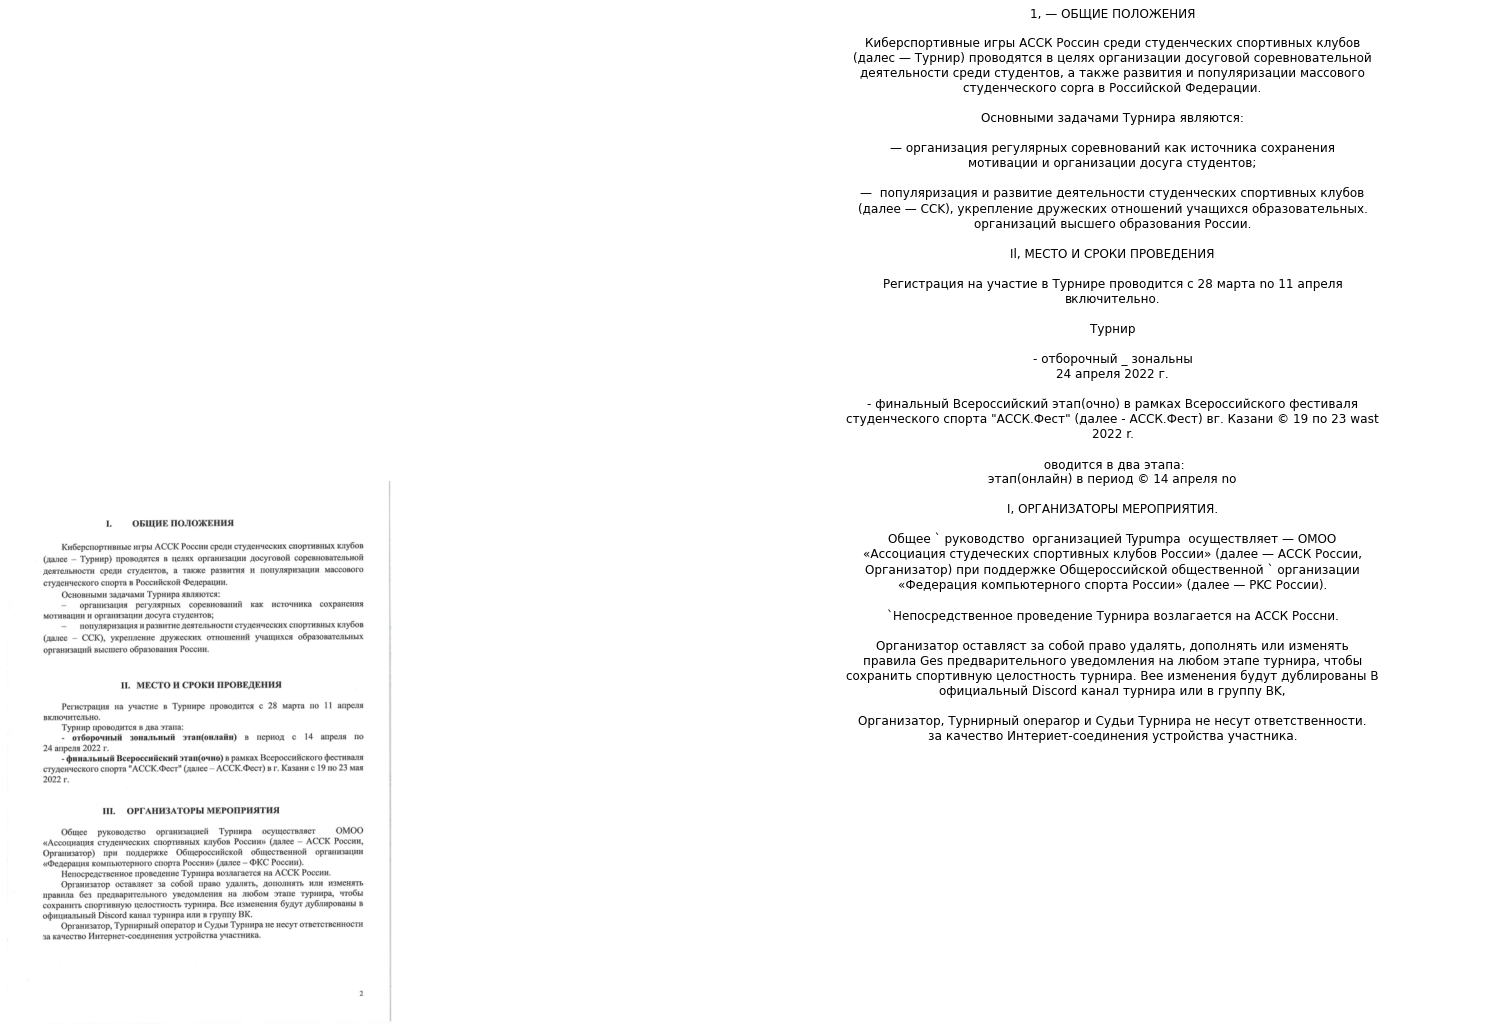

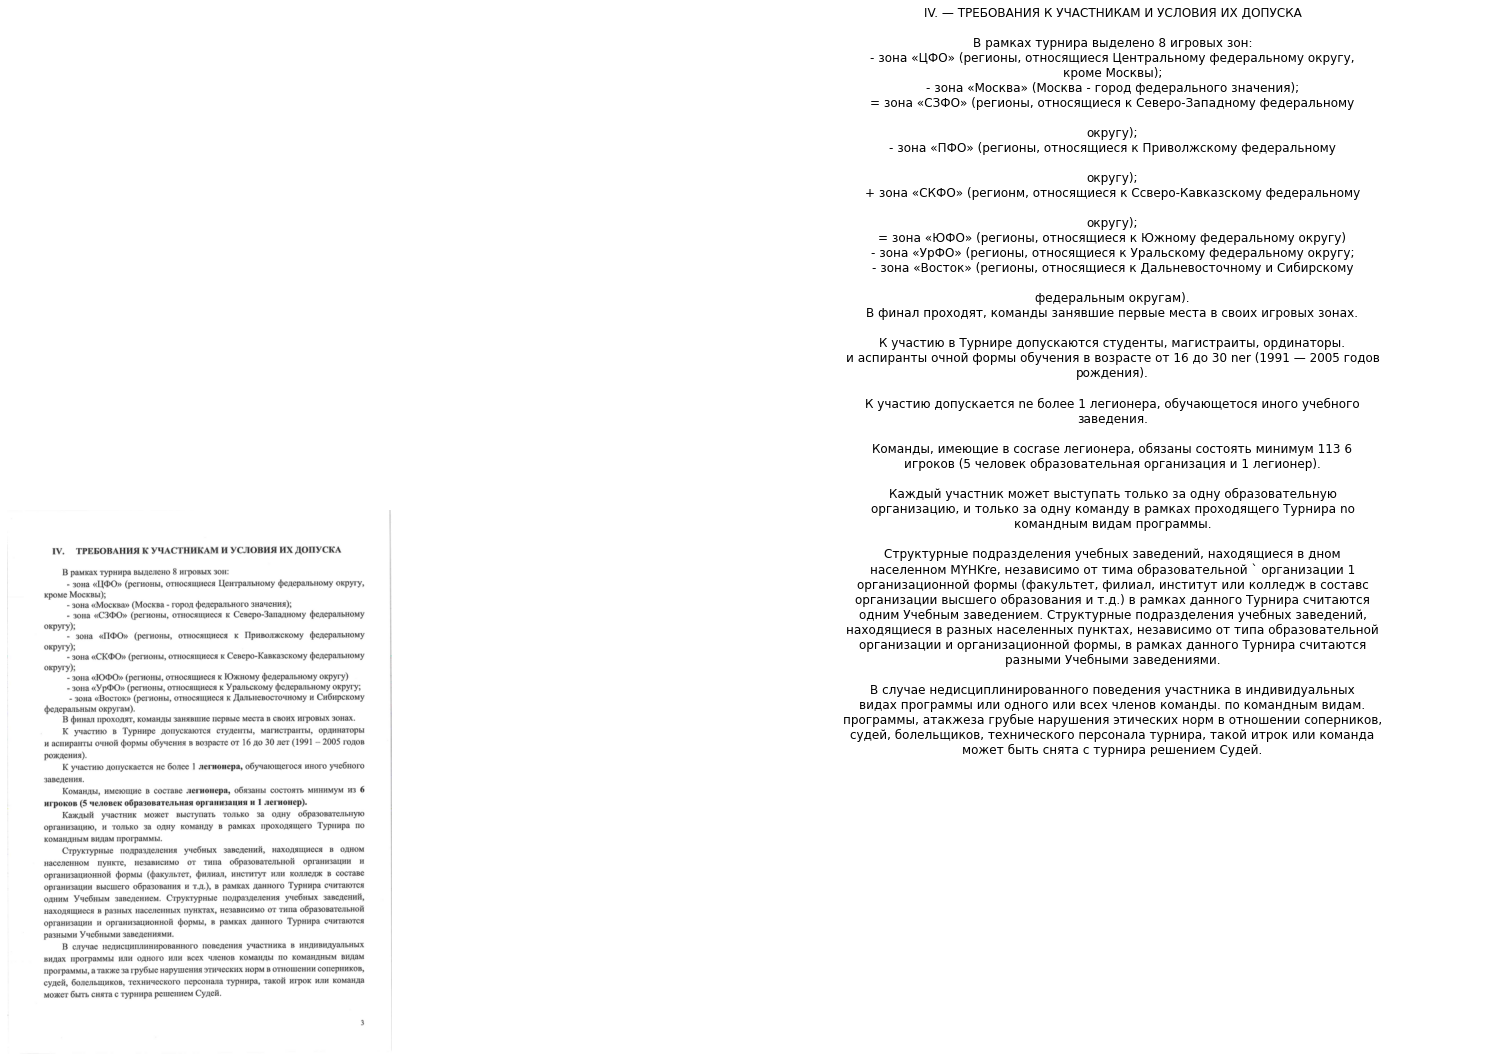

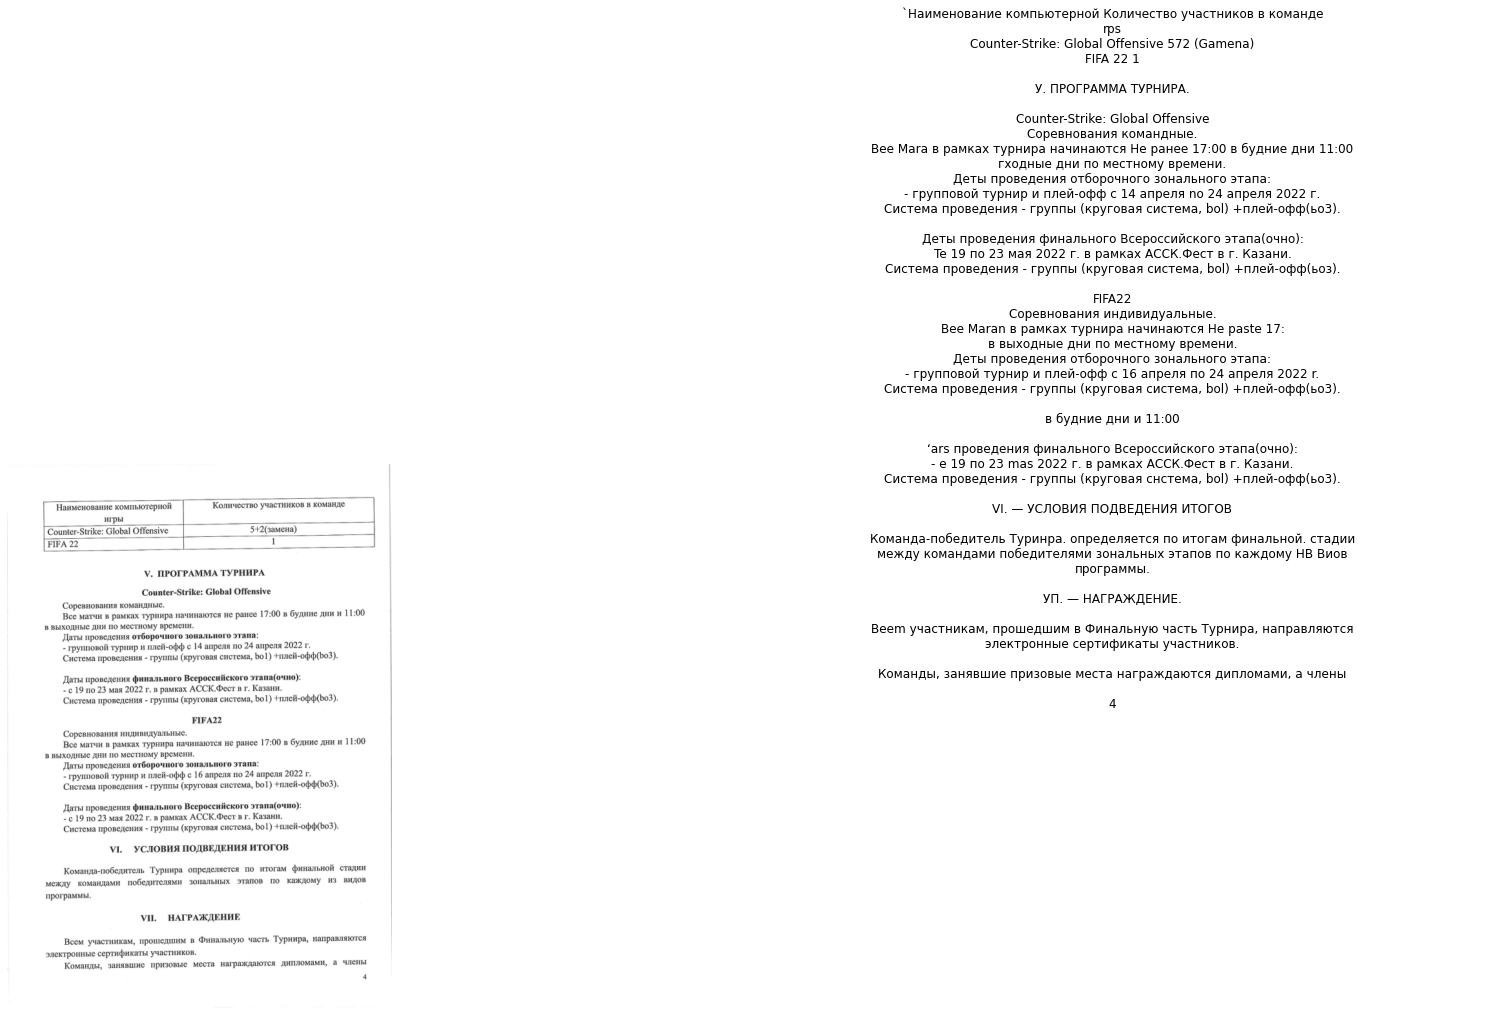

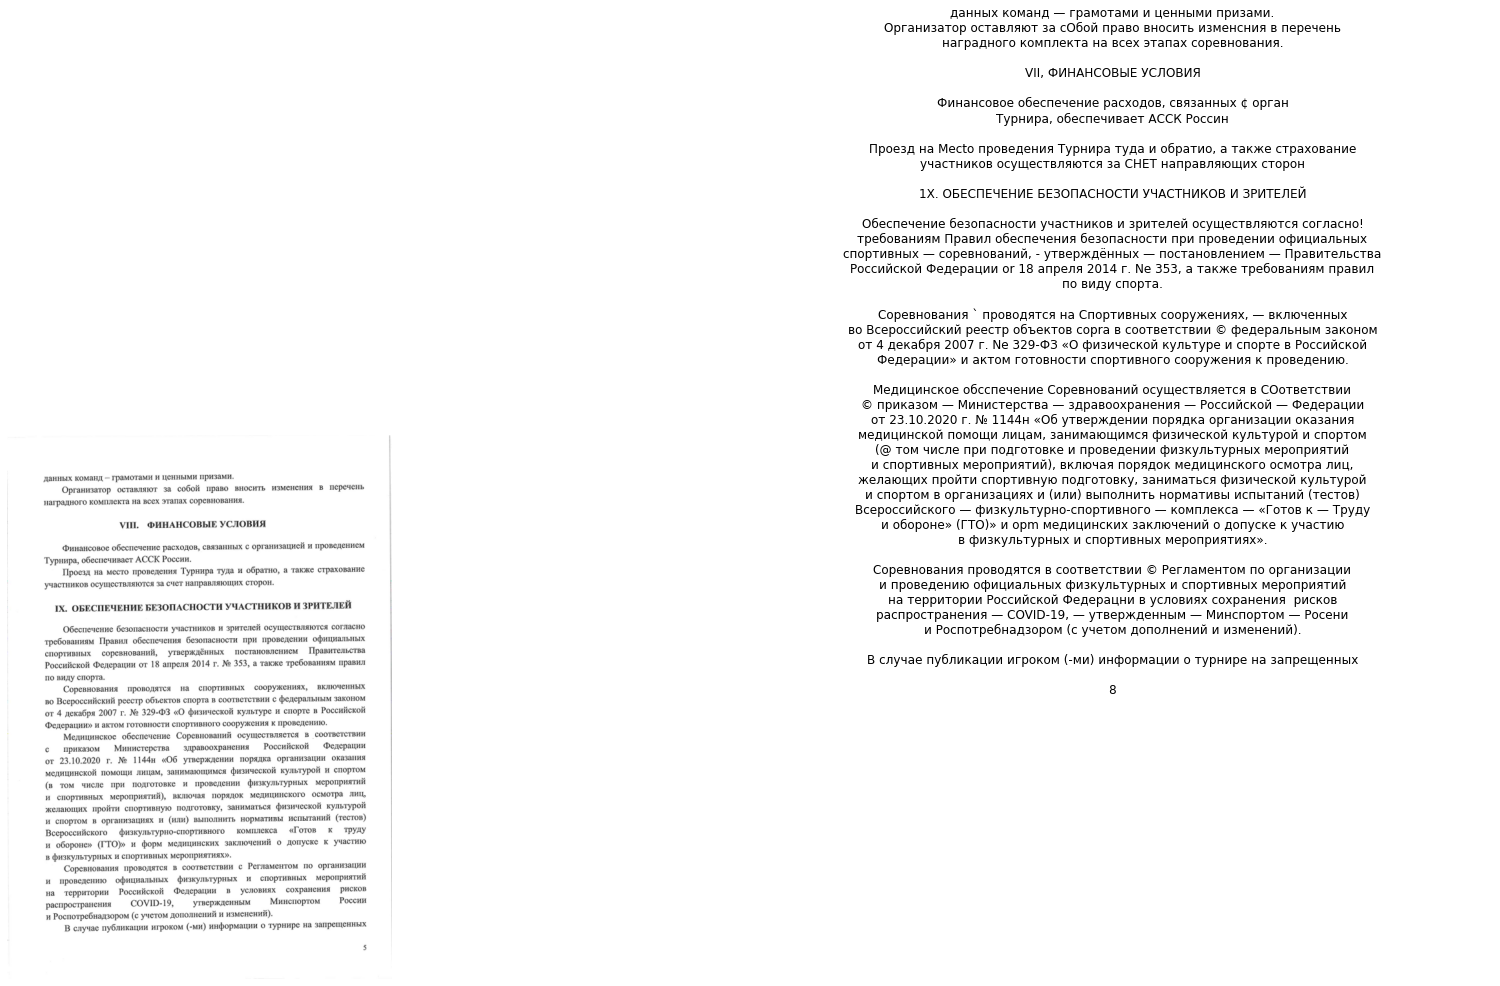

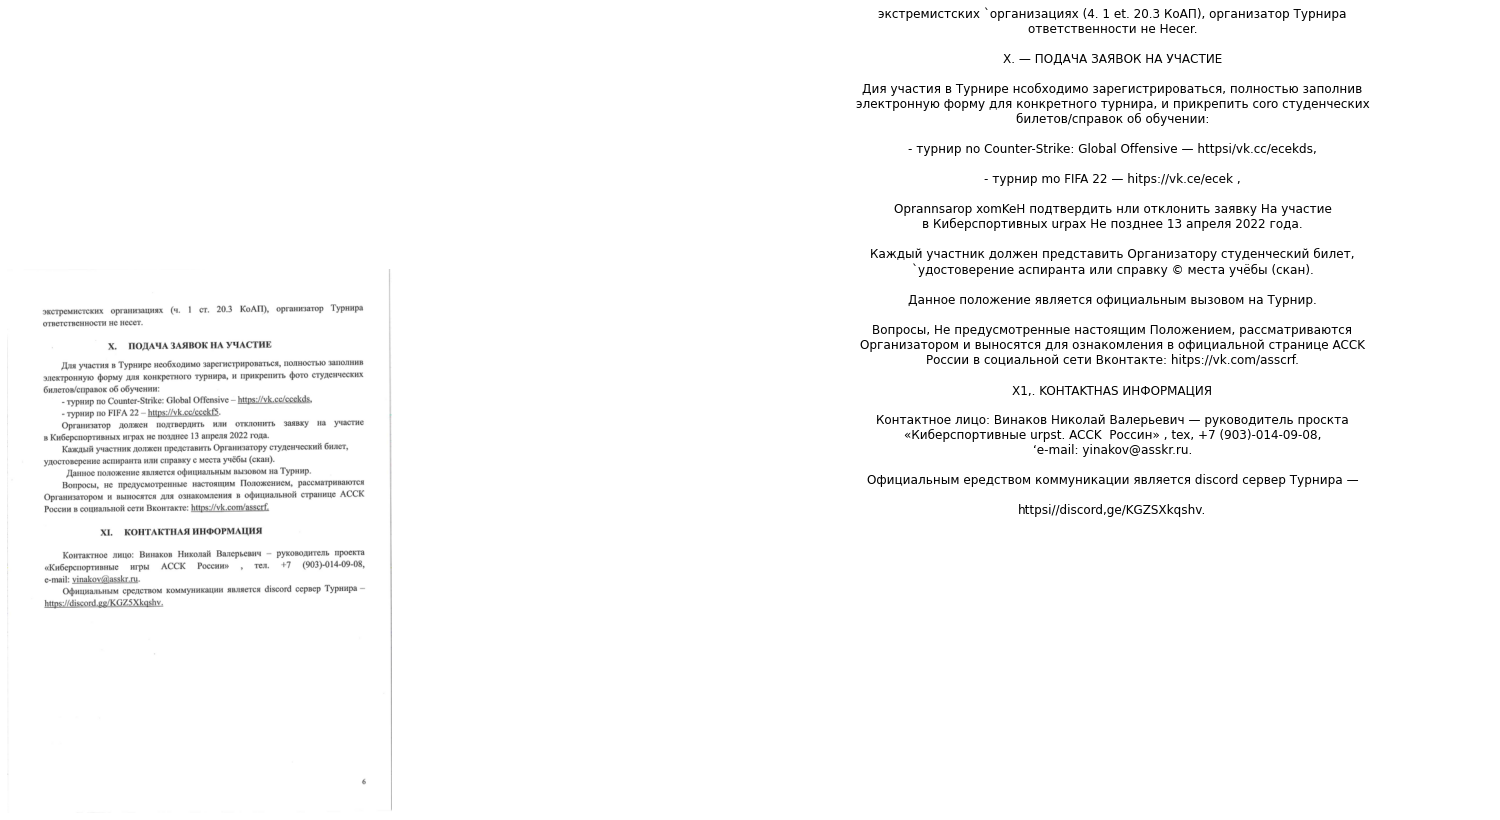

In [57]:
image = reader_pdf(files[1])